<a href="https://colab.research.google.com/github/HungPham2002/ECommerce-Customer-Churn-Prediction/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETTING UP THE ENVIRONMENT

## LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport as report
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go
from plotly import offline
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import pickle
import tensorflow as tf
import seaborn as sb

##Model Building Libraries

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
#!pip install scikit-plot
from sklearn.metrics import roc_curve, auc

# LOADING THE DATASET

In [3]:
df = pd.read_csv('/content/drive/MyDrive/E-Commerce/dataset/telecom_customer_churn.csv')

# DATA PREPROCESSING (CLEAN DATA)

In [4]:
df.profile_report()

AttributeError: ignored

In [5]:
# Dealing with nulls
df.columns=df.columns.str.replace(" ","").str.lower()
df.avgmonthlylongdistancecharges=df.avgmonthlylongdistancecharges.fillna(0.0)
df.multiplelines=df.multiplelines.fillna('no phone service')
no_internet=['internettype','onlinesecurity','onlinebackup','deviceprotectionplan','premiumtechsupport','streamingtv',
             'streamingmovies','streamingmusic','unlimiteddata']
df[no_internet]=df[no_internet].fillna('no internet service')
df.avgmonthlygbdownload=df.avgmonthlygbdownload.fillna(0)
###
# Since the company provides two main services, i.e., Phone Service and Internet Service, it is not necessary for every customer to avail of both services.
# This can result in null values in the dataset when customers do not use a particular service.
# replaced the null values in features related to phone service with "No phone service" for customers who only use internet services.
# Similarly, for features related to internet services, null values were replaced with "No internet service" for customers who only use phone services.
# Replacing null values helps increase the completeness of the dataset and makes it easier to analyze and process the data.

In [6]:
# Droping features that are of no importance for the my objective, I have dropped geographical features after finding no correlation with other features,
# and also the columns like churn category and churn reason are out of the scope of machine learning model
df=df.drop(columns=['customerid','churncategory','churnreason','totalrefunds','zipcode','longitude','latitude','city'])

In [7]:
df.shape

(7043, 30)

In [8]:
df.isnull().sum()

gender                           0
age                              0
married                          0
numberofdependents               0
numberofreferrals                0
tenureinmonths                   0
offer                            0
phoneservice                     0
avgmonthlylongdistancecharges    0
multiplelines                    0
internetservice                  0
internettype                     0
avgmonthlygbdownload             0
onlinesecurity                   0
onlinebackup                     0
deviceprotectionplan             0
premiumtechsupport               0
streamingtv                      0
streamingmovies                  0
streamingmusic                   0
unlimiteddata                    0
contract                         0
paperlessbilling                 0
paymentmethod                    0
monthlycharge                    0
totalcharges                     0
totalextradatacharges            0
totallongdistancecharges         0
totalrevenue        

In [9]:
# To avoid the biasness in the predictions i have dropped the customers information that joined the company recently
df=df.loc[~df.customerstatus.str.contains('Join')]
df.reset_index(drop=True,inplace=True)

In [10]:
df.shape

(6589, 30)

## Feature Transformation and Feature Scaling

In [ ]:
# Features having two uniques were replaced by 1 and 0 (yes/no,...).
# Features having more than two uniques were encoded using label encoder
# Continous features were standarized using sk-learn scaler method

In [11]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique

le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

5 columns were label encoded.


In [12]:
df['gender'] = [1 if each == 'Female' else 0 for each in df['gender']]

In [13]:
df.head()

,gender,age,married,numberofdependents,numberofreferrals,tenureinmonths,offer,phoneservice,avgmonthlylongdistancecharges,multiplelines,...,unlimiteddata,contract,paperlessbilling,paymentmethod,monthlycharge,totalcharges,totalextradatacharges,totallongdistancecharges,totalrevenue,customerstatus
0,1,37,1,0,2,9,None,1,42.39,No,...,Yes,One Year,1,Credit Card,65.6,593.30,0,381.51,974.81,1
1,0,46,0,0,0,9,None,1,10.69,Yes,...,No,Month-to-Month,0,Credit Card,-4.0,542.40,10,96.21,610.28,1
2,0,50,0,0,0,4,Offer E,1,33.65,No,...,Yes,Month-to-Month,1,Bank Withdrawal,73.9,280.85,0,134.60,415.45,0
3,0,78,1,0,1,13,Offer D,1,27.82,No,...,Yes,Month-to-Month,1,Bank Withdrawal,98.0,1237.85,0,361.66,1599.51,0
4,1,75,1,0,3,3,None,1,7.38,No,...,Yes,Month-to-Month,1,Credit Card,83.9,267.40,0,22.14,289.54,0


In [14]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = df.apply(lambda x: encode_data(x))
data.head()

,gender,age,married,numberofdependents,numberofreferrals,tenureinmonths,offer,phoneservice,avgmonthlylongdistancecharges,multiplelines,...,unlimiteddata,contract,paperlessbilling,paymentmethod,monthlycharge,totalcharges,totalextradatacharges,totallongdistancecharges,totalrevenue,customerstatus
0,1,37,1,0,2,9,0,1,42.39,0,...,1,1,1,1,65.6,593.30,0,381.51,974.81,1
1,0,46,0,0,0,9,0,1,10.69,1,...,0,0,0,1,-4.0,542.40,10,96.21,610.28,1
2,0,50,0,0,0,4,5,1,33.65,0,...,1,0,1,0,73.9,280.85,0,134.60,415.45,0
3,0,78,1,0,1,13,4,1,27.82,0,...,1,0,1,0,98.0,1237.85,0,361.66,1599.51,0
4,1,75,1,0,3,3,0,1,7.38,0,...,1,0,1,1,83.9,267.40,0,22.14,289.54,0


## Splitting the Dataset into test and train

In [15]:
X = data.drop(columns = "customerstatus")
y = data["customerstatus"].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [17]:
col=['totalcharges','avgmonthlylongdistancecharges','monthlycharge','totalrevenue','totallongdistancecharges',
     'tenureinmonths','totallongdistancecharges','totalextradatacharges']

In [18]:
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

In [19]:
print(X_train.shape)
print(X_test.shape)

(4612, 29)
(1977, 29)


In [ ]:
data.to_csv('/content/drive/MyDrive/E-Commerce/dataset/mycsvfile.csv',index=False)

# BUILDING MODEL WITHOUT OPTIMIZATION

In [ ]:
# At first i have just used the base models and have evaluated them to check how they are performing
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [ ]:
acc_results =[]
auc_results =[]
pre_results =[]
f1_results =[]
names = []

result_col = ["Algorithm", "ROC AUC", "Accuracy", "Precision", "f1 Score"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    # kfold = model_selection.KFold(n_splits=10)

    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train,
                     scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                     scoring="roc_auc")
    cv_pre_results = model_selection.cross_val_score(model, X_train, y_train,
                     scoring="precision")
    cv_f1_results = model_selection.cross_val_score(model, X_train, y_train,
                     scoring="f1")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    pre_results.append(cv_pre_results)
    f1_results.append(cv_f1_results)

    model_results.loc[i] = [name,
                           round(cv_acc_results.mean()*100,2),
                           round(cv_auc_results.mean()*100,2),
                           round(cv_pre_results.mean()*100,2),
                           round(cv_f1_results.mean()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC'], ascending=False)

,Algorithm,ROC AUC,Accuracy,Precision,f1 Score
1,Random Forest,86.60,92.14,88.16,91.29
0,Logistic Regression,83.93,90.66,89.02,88.74
2,Decision Tree Classifier,81.03,77.48,87.62,86.91


# FINDING GOOD HYPER PARAMETERS ON ABOVE MODELS INDIVIDUALLY

## Logistic Regression

In [ ]:
modelL=LogisticRegression()

In [ ]:
modelL.fit(X_train,y_train)

LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
pred_trainL = modelL.predict(X_train)
pred_testL=modelL.predict(X_test)

In [ ]:
acc_trainL = accuracy_score(pred_trainL, y_train)
acc_testL = accuracy_score(pred_testL, y_test)
print(f'Training accuracy {acc_trainL: .3f}')
print(f'Testing accuracy {acc_testL: .3f}')

Training accuracy  0.847
Testing accuracy  0.856


### Tuning the parameters

In [ ]:
tuned_parameters = [{'C': [10.0, 100.0, 1000.0, 10000.0],
                     'max_iter': [500, 1000]}] # hyperparameters to tune
clfL = GridSearchCV(LogisticRegression(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfL.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfL.best_params_) # best hyperparameter values

print("\nGrid scores:")
meansL = clfL.cv_results_['mean_test_score'] # mean accuracy with folds
stdsL = clfL.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansL, stdsL, clfL.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters found:
{'C': 1000.0, 'max_iter': 500}

Grid scores:
0.844 (+/-0.030) for {'C': 10.0, 'max_iter': 500}
0.843 (+/-0.031) for {'C': 10.0, 'max_iter': 1000}
0.844 (+/-0.029) for {'C': 100.0, 'max_iter': 500}
0.842 (+/-0.030) for {'C': 100.0, 'max_iter': 1000}
0.845 (+/-0.031) for {'C': 1000.0, 'max_iter': 500}
0.843 (+/-0.030) for {'C': 1000.0, 'max_iter': 1000}
0.845 (+/-0.029) for {'C': 10000.0, 'max_iter': 500}
0.843 (+/-0.030) for {'C': 10000.0, 'max_iter': 1000}


###Evaluating on the basis of Best found parameters

LogisticRegression(C=1000, max_iter=500)
Results on test data
Test accuracy =  0.8538
Test precision =  0.8982
Test recall =  0.8976
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       561
           1       0.90      0.90      0.90      1416

    accuracy                           0.85      1977
   macro avg       0.82      0.82      0.82      1977
weighted avg       0.85      0.85      0.85      1977



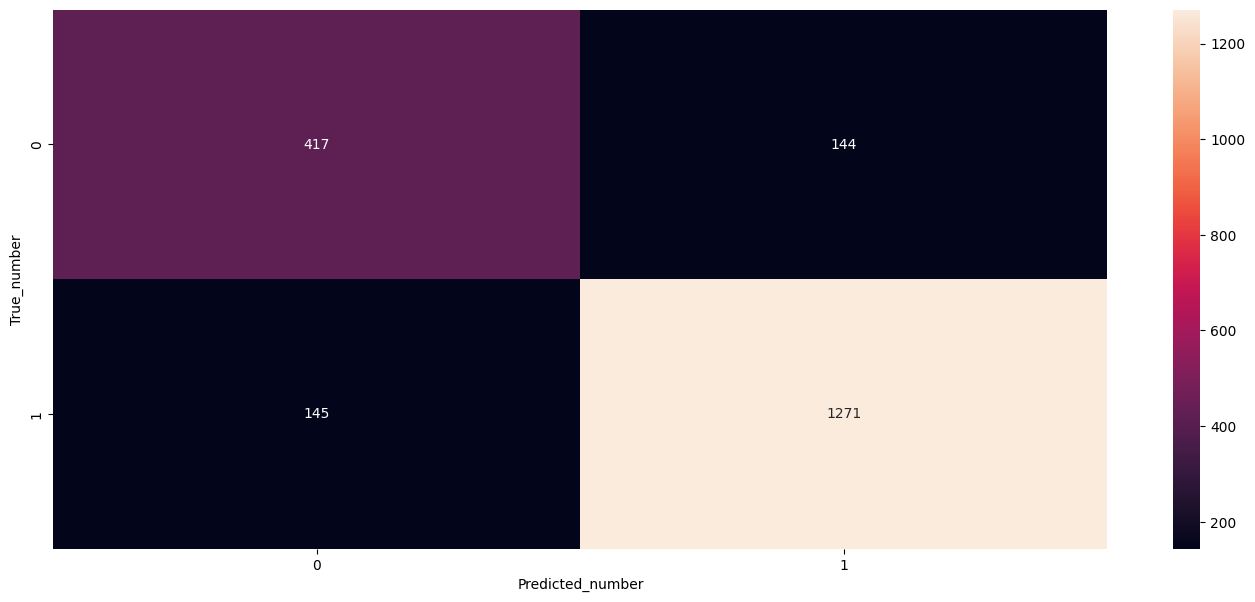

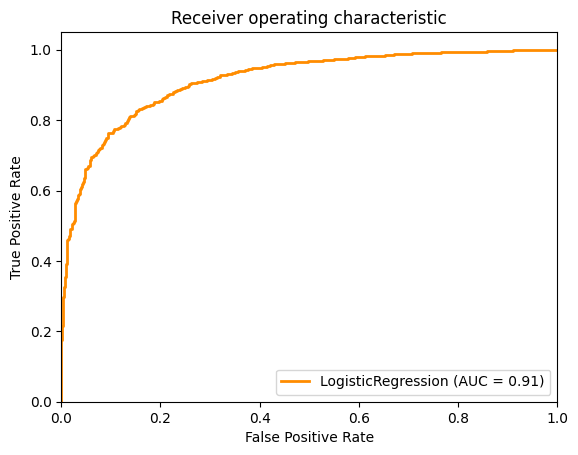

In [ ]:
# Specify non-default hyper-parameter values
C = 1000
max_iter = 500
# Train and test model
good_modelL = LogisticRegression(C = C, max_iter=max_iter) # create model
print(good_modelL) # display model parameters
good_modelL.fit(X_train,y_train) # train model
predL = good_modelL.predict(X_test) # predicted output for test examples
print("Results on test data")
accL = accuracy_score(y_test, predL) # accuracy on test examples
precL = precision_score(y_test, predL) # precision on test examples
recaL = recall_score(y_test, predL) # recall on test examples
print(f'Test accuracy = {accL: .4f}') # round to 4 decimal places
print(f'Test precision = {precL: .4f}') # round to 4 decimal places
print(f'Test recall = {recaL: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predL))

# Confusion Matrix
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=predL)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')


fpr, tpr, thresholds = roc_curve(y_test, good_modelL.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='LogisticRegression (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

In [ ]:
modelD= DecisionTreeClassifier()

In [ ]:
modelD.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
pred_train_D = modelD.predict(X_train)
pred_test_D=modelD.predict(X_test)

In [ ]:
acc_train_D = accuracy_score(pred_train_D, y_train)
acc_test_D = accuracy_score(pred_test_D, y_test)
print(f'Training accuracy {acc_train_D: .3f}')
print(f'Testing accuracy {acc_test_D: .3f}')

Training accuracy  1.000
Testing accuracy  0.836


###Tuning the parameters

In [ ]:
tuned_parameters = [{'criterion':['gini', 'entropy'],
                     'max_leaf_nodes': range(5,25)}] # hyperparameters to tune

clf_D = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clf_D.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clf_D.best_params_) # best hyperparameter balues

print("\nGrid scores:")
means_D = clf_D.cv_results_['mean_test_score'] # mean accuracy with folds
stds_D = clf_D.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means_D, stds_D, clf_D.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best parameters found:
{'criterion': 'gini', 'max_leaf_nodes': 19}

Grid scores:
0.844 (+/-0.022) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.851 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.853 (+/-0.010) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.857 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.857 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.856 (+/-0.010) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.856 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.856 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 12}
0.856 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 13}
0.858 (+/-0.014) for {'criterion': 'gini', 'max_leaf_nodes': 14}
0.859 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 15}
0.860 (+/-0.020) for {'criterion': 'gini', 'max_leaf_nodes': 16}
0.859 (+/-0.019) for {'criterion': 'gini', 'max_leaf_nodes': 17}
0.859 (+/-0.017)

### Evaluating on the basis of Best found parameters

DecisionTreeClassifier(max_leaf_nodes=19)
Results on test data
Test accuracy =  0.8553
Test precision =  0.8655
Test recall =  0.9449
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       561
           1       0.87      0.94      0.90      1416

    accuracy                           0.86      1977
   macro avg       0.84      0.79      0.81      1977
weighted avg       0.85      0.86      0.85      1977



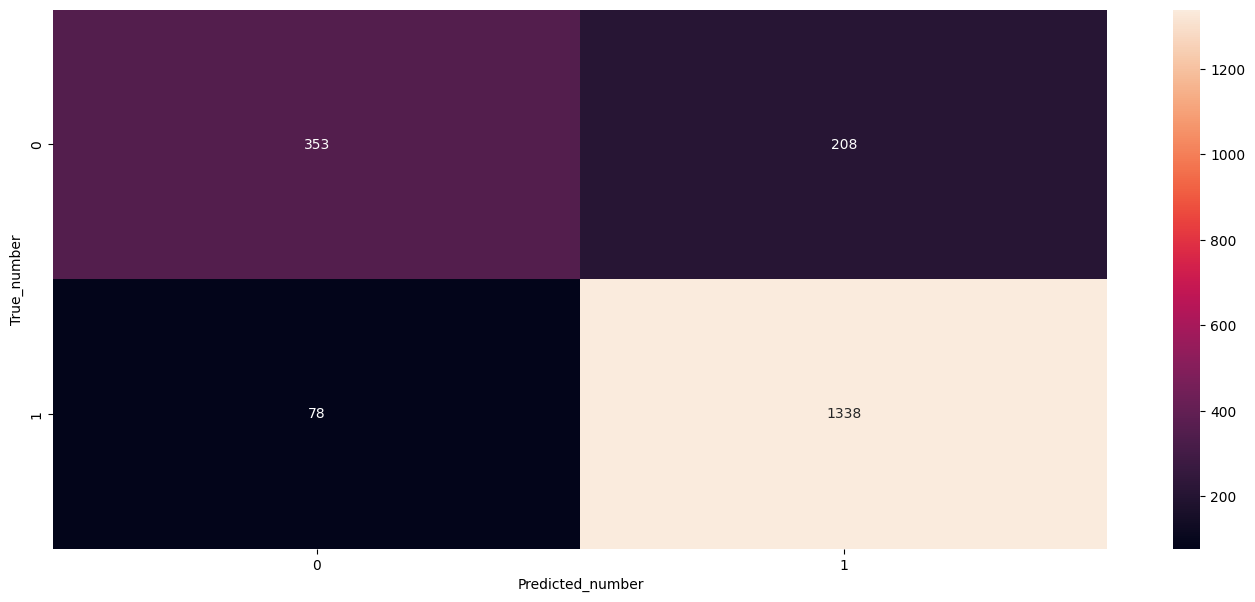

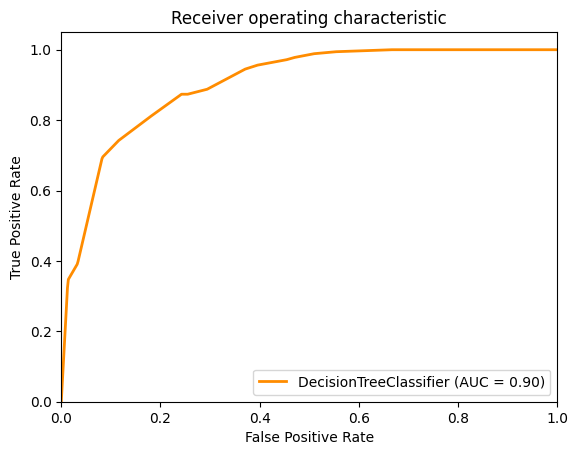

In [ ]:
criterion = 'gini'
max_leaf_nodes = 19
# Train and test model
good_model_D = DecisionTreeClassifier(criterion=criterion,
                                    max_leaf_nodes=max_leaf_nodes) # create model
print(good_model_D) # display model parameters
good_model_D.fit(X_train, y_train) # train model
pred_D = good_model_D.predict(X_test) # predicted output for test examples
print("Results on test data")
acc_D = accuracy_score(y_test, pred_D) # accuracy on test examples
prec_D = precision_score(y_test, pred_D) # precision on test examples
reca_D = recall_score(y_test, pred_D) # recall on test examples
print(f'Test accuracy = {acc_D: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_D: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_D: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_D))

# Confusion Matrix
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=pred_D)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

fpr, tpr, thresholds = roc_curve(y_test, good_model_D.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='DecisionTreeClassifier (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##Random Forest

In [ ]:
modelR = RandomForestClassifier()

In [ ]:
modelR.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
pred_train = modelR.predict(X_train)
pred_test=modelR.predict(X_test)

In [ ]:
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)
print(f'Training accuracy {acc_train: .3f}')
print(f'Testing accuracy {acc_test: .3f}')

Training accuracy  1.000
Testing accuracy  0.869


###Tuning the Parameters

In [ ]:
tuned_parameters = [{'n_estimators': [25, 50, 75],
                     'max_features': [15, 20, 25],
                     'max_leaf_nodes': [8, 16, 24]}] # hyperparameters to tune

clfR = GridSearchCV(RandomForestClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfR.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfR.best_params_) # best hyperparameter values

print("\nGrid scores:")
means = clfR.cv_results_['mean_test_score'] # mean accuracy with folds
stds = clfR.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means, stds, clfR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters found:
{'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 50}

Grid scores:
0.869 (+/-0.013) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 25}
0.866 (+/-0.009) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 50}
0.866 (+/-0.016) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 75}
0.871 (+/-0.012) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 25}
0.872 (+/-0.018) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 50}
0.870 (+/-0.014) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 75}
0.870 (+/-0.007) for {'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 25}
0.870 (+/-0.013) for {'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 50}
0.869 (+/-0.013) for {'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 75}
0.865 (+/-0.009) for {'max_features': 20, 'max_leaf_nodes': 8, 'n_estimators': 25}
0

###Evaluating Random forest classifier with selected hyper-parameters

RandomForestClassifier(max_features=15, max_leaf_nodes=16, n_estimators=50)
Results on test data
Test accuracy =  0.8634
Test precision =  0.8664
Test recall =  0.9569
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       561
           1       0.87      0.96      0.91      1416

    accuracy                           0.86      1977
   macro avg       0.86      0.79      0.82      1977
weighted avg       0.86      0.86      0.86      1977



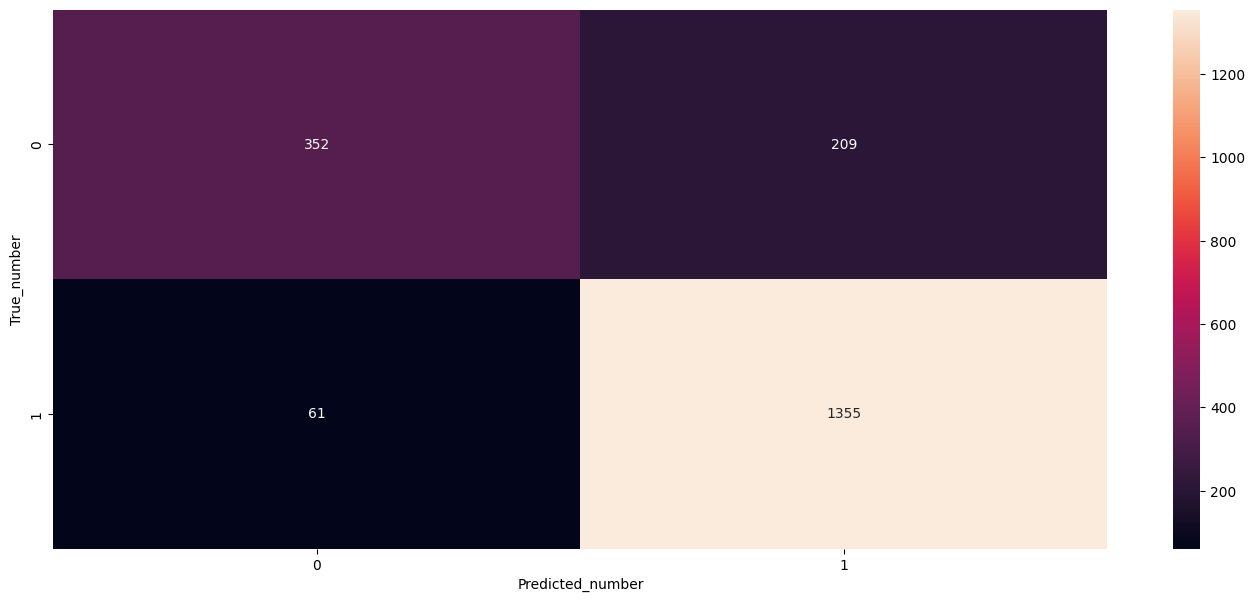

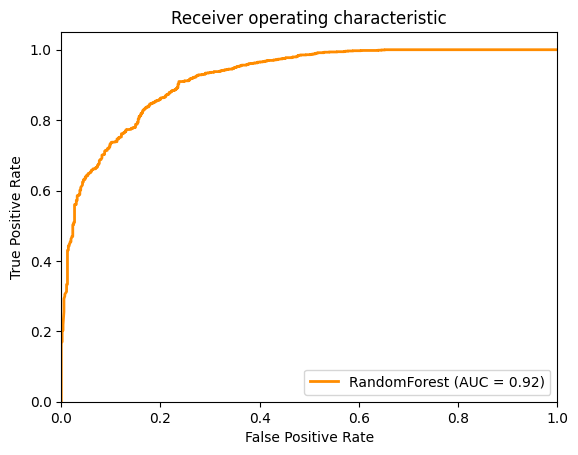

In [ ]:
# Specify non-default hyper-parameter values
max_features = 15
max_leaf_nodes = 16
n_estimators = 50
# Train and test model
good_model = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes,
                                    max_features = max_features,
                                    n_estimators=n_estimators, ) # create model
print(good_model) # display model parameters
good_model.fit(X_train, y_train) # train model
pred = good_model.predict(X_test) # predicted output for test examples
print("Results on test data")
acc = accuracy_score(y_test, pred) # accuracy on test examples
prec = precision_score(y_test, pred) # precision on test examples
reca = recall_score(y_test, pred) # recall on test examples
print(f'Test accuracy = {acc: .4f}') # round to 4 decimal places
print(f'Test precision = {prec: .4f}') # round to 4 decimal places
print(f'Test recall = {reca: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred))

# Confusion Matrix
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=pred)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

fpr, tpr, thresholds = roc_curve(y_test, good_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='RandomForest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Using K-fold Cross validation to evaluate model performance

In [20]:
models_opt = []

models_opt.append(('Logistic Regression', LogisticRegression(solver='liblinear',C = 1000, max_iter=500, random_state = 0)))
models_opt.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=19, random_state = 0)))
models_opt.append(('Random Forest', RandomForestClassifier(max_leaf_nodes = 16,max_features = 15,
                                                           n_estimators = 50,criterion = 'entropy', random_state = 0)))

In [21]:
acc_results_opt =[]
auc_results_opt =[]
pre_results_opt =[]
f1_results_opt =[]
names_opt = []

result_col_opt = ["Algorithm", "ROC AUC", "Accuracy", 'Precision', 'F1 Scores']
model_results_opt = pd.DataFrame(columns = result_col_opt)

i=0
# K- fold cross validation

for name, model in models_opt:
    names_opt.append(name)
    kfold = model_selection.KFold(n_splits=10)

    cv_acc_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="accuracy")
    cv_auc_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    cv_pre_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="precision")
    cv_f1_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="f1")
    acc_results_opt.append(cv_acc_results_opt)
    auc_results_opt.append(cv_auc_results_opt)
    pre_results_opt.append(cv_pre_results_opt)
    f1_results_opt.append(cv_f1_results_opt)
    model_results_opt.loc[i] = [name,
                           round(cv_auc_results_opt.mean()*100,2),
                           round(cv_acc_results_opt.mean()*100,2),
                           round(cv_pre_results_opt.mean()*100,2),
                           round(cv_f1_results_opt.mean()*100,2)]
    i+=1

model_results_opt.sort_values(by = ['ROC AUC'], ascending=False)

,Algorithm,ROC AUC,Accuracy,Precision,F1 Scores
2,Random Forest,92.79,86.82,88.55,91.05
0,Logistic Regression,91.04,84.41,89.25,89.08
1,Decision Tree Classifier,90.41,86.36,87.77,90.80


# TESTING MODEL PERFORMANCES ON TEST DATA

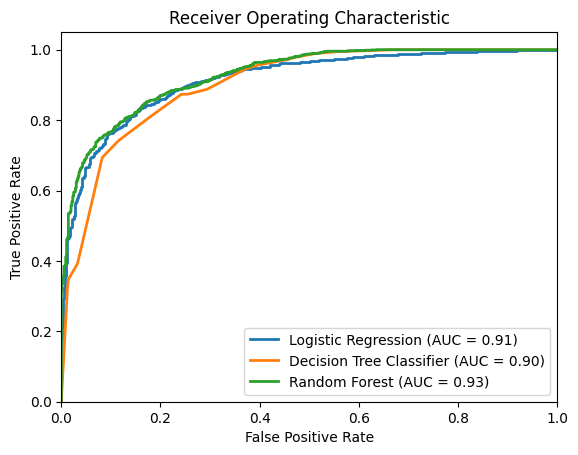

                      Model  Accuracy  Precision  F1 Score    Recall
0       Logistic Regression  0.855336   0.899576  0.898940  0.898305
2             Random Forest  0.859383   0.867097  0.906271  0.949153
1  Decision Tree Classifier  0.855336   0.865459  0.903444  0.944915


In [28]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'F1 Score', 'Recall'])
for name, model in models_opt:
    model.fit(X_train, y_train)  # Huấn luyện mô hình trên toàn bộ tập huấn luyện
    y_pred = model.predict(X_test)  # Dự đoán nhãn cho tập test

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)

    results = results.append({'Model': name, 'Accuracy': accuracy,
                              'Precision': precision, 'F1 Score': f1, 'Recall': recall}, ignore_index=True)

# Sắp xếp DataFrame theo giảm dần của ROC AUC
results = results.sort_values(by='Precision', ascending=False)

plt.figure()
for name, model in models_opt:
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print(results)